# Looking at Switchiness

/cellar/users/agross/anaconda2/lib/python2.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


importing IPython notebook from metaPCNA

importing IPython notebook from Imports

0.921417565485


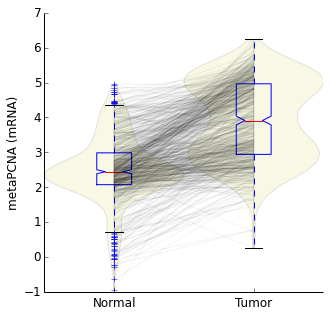

In [1]:
import NotebookImport
from metaPCNA import *

In [2]:
f_win.order().head()

GPM6B     -0.38
SFRP1     -0.38
PIK3C2G   -0.36
PKHD1L1   -0.36
SCNN1B    -0.36
Name: fraction overexpressed\n(detrended), dtype: float64

In [3]:
f_win.order().tail()

LOC283914    0.41
CST2         0.42
C16orf13     0.43
GABRD        0.47
SEMA5B       0.48
Name: fraction overexpressed\n(detrended), dtype: float64

In [4]:
pcna_win.order().tail()

KIF23     0.43
ZNF488    0.44
CDC25A    0.45
VRK1      0.47
GMNN      0.49
Name: meta-PCNA\n(detrended), dtype: float64

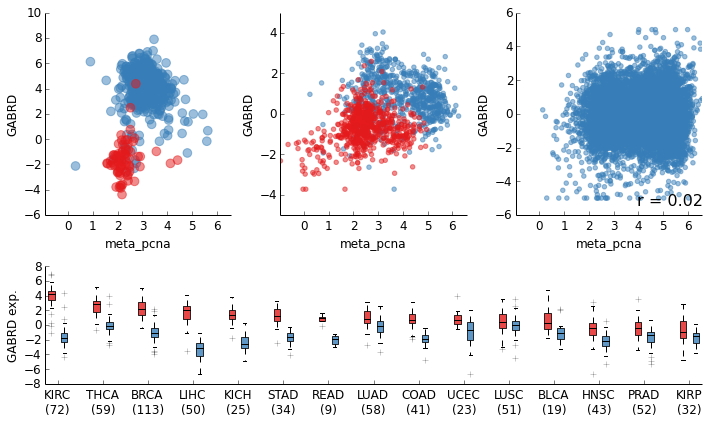

In [5]:
switch_plot('GABRD')

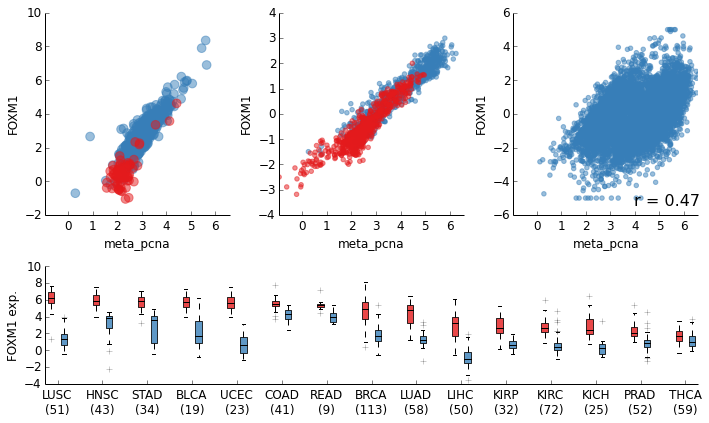

In [6]:
switch_plot('FOXM1')

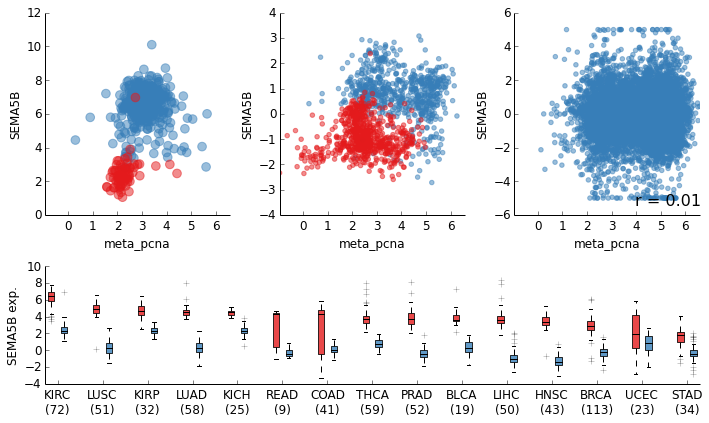

In [7]:
switch_plot('SEMA5B')

In [8]:
gs2 = gene_sets.ix[f_win.index].fillna(0)
r2 = screen_feature(f_win, rev_kruskal, gs2.T, 
                    align=False)
fp = (1.*gene_sets.T * f_win).T.dropna().replace(0, np.nan).mean().order()
fp.name = 'mean frac'

In [9]:
r2.ix[ti(fp > 0)].join(fp).sort('p').head()

,H,p,q,mean frac
Gene_Set,,,,
REACTOME_TRANSLATION,158.08,2.97e-36,3.86e-33,0.13
REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN_TARGETING_TO_MEMBRANE,156.75,5.80e-36,3.86e-33,0.15
REACTOME_METABOLISM_OF_PROTEINS,155.31,1.20e-35,5.31e-33,0.07
KEGG_RIBOSOME,144.04,3.47e-33,1.16e-30,0.16
REACTOME_3_UTR_MEDIATED_TRANSLATIONAL_REGULATION,140.77,1.81e-32,4.81e-30,0.15


I am pulling Ribosome as the top hit because it has the largest effect size of a few very significant gene sets. 

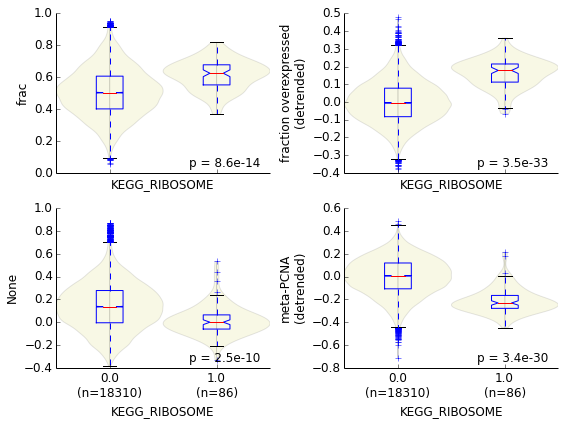

In [27]:
p = gs2['KEGG_RIBOSOME']
fig, axs = subplots(2,2, figsize=(8,6), sharex=True)
axs = axs.flatten()
violin_plot_pandas(p, dx_rna.frac, ax=axs[0])
violin_plot_pandas(p, pcna_corr, ax=axs[2])
violin_plot_pandas(p, f_win, ax=axs[1])
violin_plot_pandas(p, pcna_win, ax=axs[3])
for ax in axs:
    prettify_ax(ax)
fig.tight_layout()

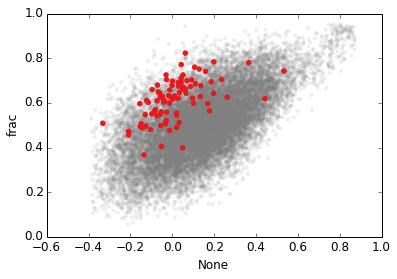

In [28]:
fig, ax = subplots()
series_scatter(pcna_corr.ix[ti(p==0)], dx_rna.frac, color='grey', 
               s=10, alpha=.1, ax=ax, ann=None)
series_scatter(pcna_corr.ix[ti(p>0)], dx_rna.frac, color=colors[0], ax=ax,
               alpha=1, s=20, ann=None)

Look for genesets associated with our signal that are not too overlapping with ribosome. 

In [10]:
c = screen_feature(gene_sets['KEGG_RIBOSOME'], chi2_cont_test, gene_sets.T)

In [21]:
r2.ix[ti(c.p > .01)].ix[ti(fp > 0)].join(fp).sort('p').head(6)

,H,p,q,mean frac
Gene_Set,,,,
KEGG_SYSTEMIC_LUPUS_ERYTHEMATOSUS,82.42,1.10e-19,1.22e-17,0.10
REACTOME_ANTIGEN_PROCESSING_CROSS_PRESENTATION,62.76,2.33e-15,2.38e-13,0.11
REACTOME_ER_PHAGOSOME_PATHWAY,55.64,8.70e-14,7.23e-12,0.12
REACTOME_IMMUNE_SYSTEM,53.93,2.08e-13,1.63e-11,0.03
REACTOME_RNA_POL_I_PROMOTER_OPENING,52.45,4.40e-13,3.25e-11,0.12
REACTOME_PACKAGING_OF_TELOMERE_ENDS,45.35,1.65e-11,1.15e-09,0.12


In [14]:
pd.crosstab(gs2['REACTOME_PACKAGING_OF_TELOMERE_ENDS'], 
            gs2['REACTOME_ANTIGEN_PROCESSING_CROSS_PRESENTATION'])

REACTOME_ANTIGEN_PROCESSING_CROSS_PRESENTATION,0.0,1.0
REACTOME_PACKAGING_OF_TELOMERE_ENDS,,
0,18329,72
1,42,0


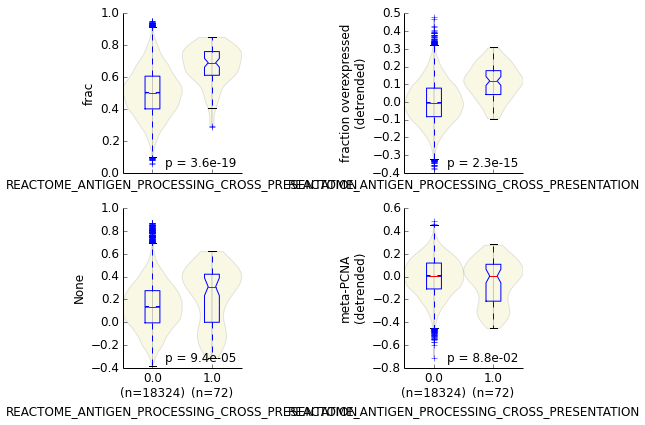

In [17]:
p = gs2['REACTOME_ANTIGEN_PROCESSING_CROSS_PRESENTATION']
fig, axs = subplots(2,2, figsize=(8,6), sharex=True)
axs = axs.flatten()
violin_plot_pandas(p, dx_rna.frac, ax=axs[0])
violin_plot_pandas(p, pcna_corr, ax=axs[2])
violin_plot_pandas(p, f_win, ax=axs[1])
violin_plot_pandas(p, pcna_win, ax=axs[3])
for ax in axs:
    prettify_ax(ax)
fig.tight_layout()

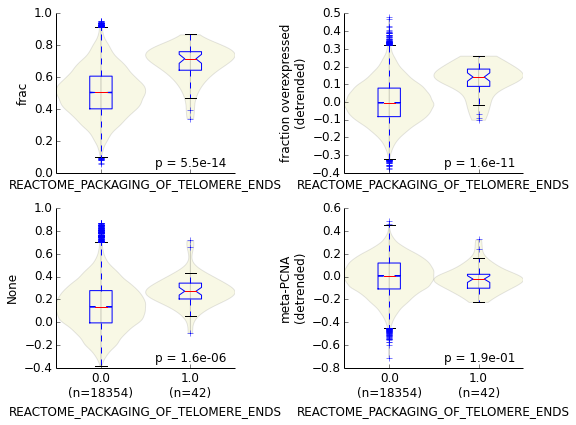

In [25]:
p = gs2['REACTOME_PACKAGING_OF_TELOMERE_ENDS']
fig, axs = subplots(2,2, figsize=(8,6), sharex=True)
axs = axs.flatten()
violin_plot_pandas(p, dx_rna.frac, ax=axs[0])
violin_plot_pandas(p, pcna_corr, ax=axs[2])
violin_plot_pandas(p, f_win, ax=axs[1])
violin_plot_pandas(p, pcna_win, ax=axs[3])
for ax in axs:
    prettify_ax(ax)
fig.tight_layout()

In [15]:
r2.ix[ti(fp < 0)].join(fp).sort('p').head(6)

,H,p,q,mean frac
Gene_Set,,,,
KEGG_FATTY_ACID_METABOLISM,42.00,9.14e-11,5.79e-09,-0.13
KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_DEGRADATION,38.33,5.97e-10,3.31e-08,-0.11
REACTOME_GENERIC_TRANSCRIPTION_PATHWAY,34.89,3.48e-09,1.36e-07,-0.03
KEGG_PROPANOATE_METABOLISM,31.00,2.57e-08,7.65e-07,-0.12
REACTOME_BIOLOGICAL_OXIDATIONS,26.22,3.05e-07,6.98e-06,-0.05
KEGG_DRUG_METABOLISM_CYTOCHROME_P450,24.42,7.74e-07,1.56e-05,-0.07


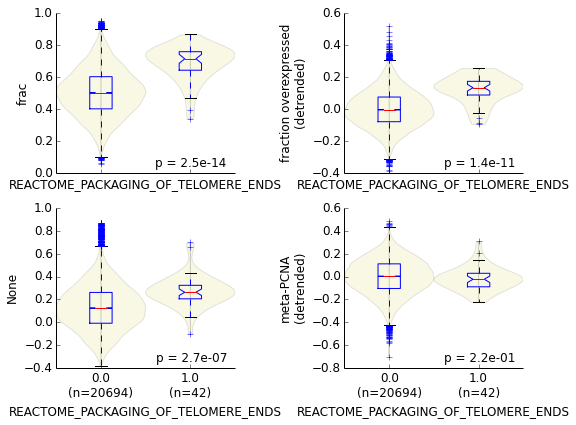

In [17]:
p = gs2['REACTOME_PACKAGING_OF_TELOMERE_ENDS']
fig, axs = subplots(2,2, figsize=(8,6), sharex=True)
axs = axs.flatten()
violin_plot_pandas(p, dx_rna.frac, ax=axs[0])
violin_plot_pandas(p, pcna_corr, ax=axs[2])
violin_plot_pandas(p, f_win, ax=axs[1])
violin_plot_pandas(p, pcna_win, ax=axs[3])
for ax in axs:
    prettify_ax(ax)
fig.tight_layout()

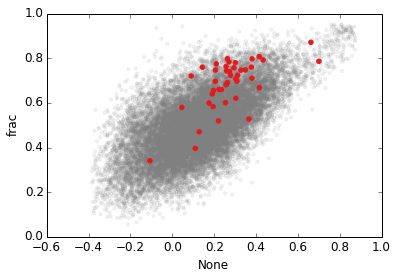

In [18]:
fig, ax = subplots()
series_scatter(pcna_corr.ix[ti(p==0)], dx_rna.frac, color='grey', 
               s=10, alpha=.1, ax=ax, ann=None)
series_scatter(pcna_corr.ix[ti(p>0)], dx_rna.frac, color=colors[0], ax=ax,
               alpha=1, s=20, ann=None)

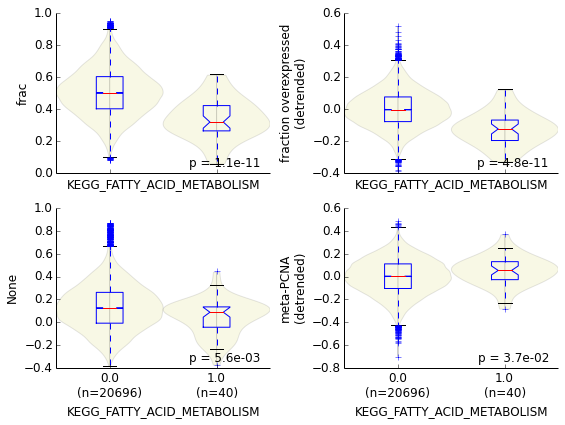

In [19]:
p = gs2['KEGG_FATTY_ACID_METABOLISM']
fig, axs = subplots(2,2, figsize=(8,6), sharex=True)
axs = axs.flatten()
violin_plot_pandas(p, dx_rna.frac, ax=axs[0])
violin_plot_pandas(p, pcna_corr, ax=axs[2])
violin_plot_pandas(p, f_win, ax=axs[1])
violin_plot_pandas(p, pcna_win, ax=axs[3])
for ax in axs:
    prettify_ax(ax)
fig.tight_layout()

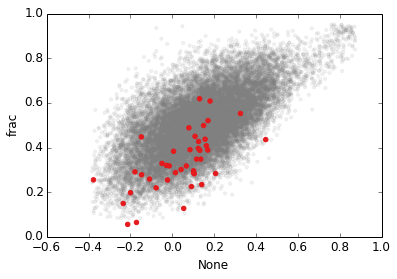

In [20]:
fig, ax = subplots()
series_scatter(pcna_corr.ix[ti(p==0)], dx_rna.frac, color='grey', 
               s=10, alpha=.1, ax=ax, ann=None)
series_scatter(pcna_corr.ix[ti(p>0)], dx_rna.frac, color=colors[0], ax=ax,
               alpha=1, s=20, ann=None)

In [21]:
gs2 = gene_sets.ix[pcna_win.index].fillna(0)
r2 = screen_feature(pcna_win, rev_kruskal, gs2.T, 
                    align=False)
fp = (1.*gene_sets.T * pcna_win).T.dropna().replace(0, np.nan).mean().order()
fp.name = 'mean frac'

In [22]:
r2.ix[ti(fp > 0)].join(fp).sort('p').head(4)

,H,p,q,mean frac
Gene_Set,,,,
REACTOME_CELL_CYCLE_MITOTIC,181.30,2.53e-41,1.12e-38,0.13
REACTOME_CELL_CYCLE,161.47,5.41e-37,1.80e-34,0.11
REACTOME_MRNA_PROCESSING,145.78,1.45e-33,3.21e-31,0.15
REACTOME_DNA_REPLICATION,139.66,3.15e-32,5.24e-30,0.15


In [23]:
r2.ix[ti(fp < 0)].join(fp).sort('p').head(4)

,H,p,q,mean frac
Gene_Set,,,,
NABA_MATRISOME,258.19,4.26e-58,5.66e-55,-0.08
NABA_MATRISOME_ASSOCIATED,192.37,9.65e-44,6.42e-41,-0.08
REACTOME_PEPTIDE_CHAIN_ELONGATION,146.11,1.23e-33,3.21e-31,-0.22
KEGG_RIBOSOME,145.45,1.71e-33,3.25e-31,-0.22


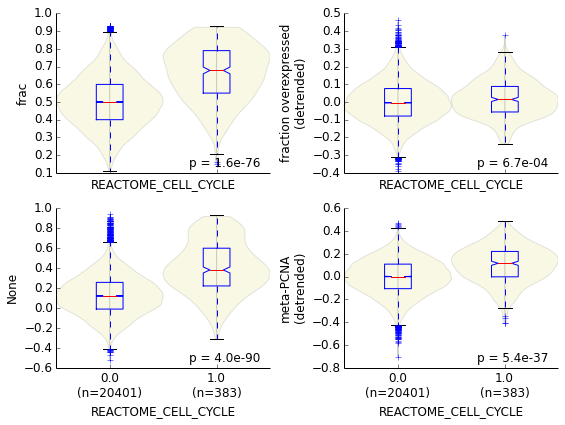

In [24]:
p = gs2['REACTOME_CELL_CYCLE']
fig, axs = subplots(2,2, figsize=(8,6), sharex=True)
axs = axs.flatten()
violin_plot_pandas(p, dx_rna.frac, ax=axs[0])
violin_plot_pandas(p, pcna_corr, ax=axs[2])
violin_plot_pandas(p, f_win, ax=axs[1])
violin_plot_pandas(p, pcna_win, ax=axs[3])
for ax in axs:
    prettify_ax(ax)
fig.tight_layout()

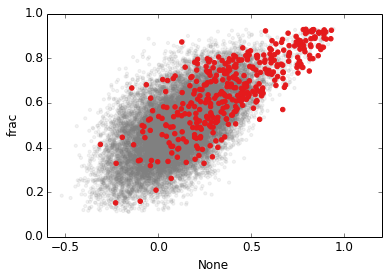

In [25]:
fig, ax = subplots()
series_scatter(pcna_corr.ix[ti(p==0)], dx_rna.frac, color='grey', 
               s=10, alpha=.1, ax=ax, ann=None)
series_scatter(pcna_corr.ix[ti(p>0)], dx_rna.frac, color=colors[0], ax=ax,
               alpha=1, s=20, ann=None)
